**Цель**: Изучить применение моделей кластеризации

**Описание задания**: В домашнем задании нужно сократить число цветов в палитре изображения. Картинку для выполнения работы можно выбрать любую, главное условие – наличие на ней разных цветов, для того, чтобы результат работы моделей был заметен.
Для выполнения работы необходимо выделить кластеры в пространстве RGB, объекты соответствуют пикселям изображения. После выделения кластеров все пиксели, отнесенные в один кластер, заполняются одним цветом. Цвет – центроид соответствующего кластера.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import skimage

from skimage import io
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

**Этапы работы**

# 1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).
*   Для отображения картинки воспользуйтесь вспомогательной функцией:
*   Для загрузки картинки можно использовать код:

In [3]:
img = io.imread('https://million-wallpapers.com/wallpapers/0/94/small/355700366442078.jpg')
title = 'beach'

Сама картинка:

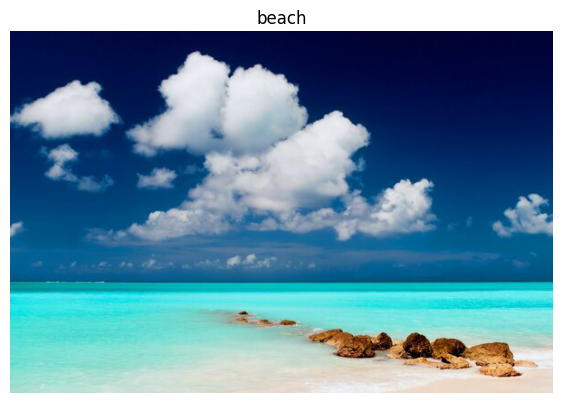

In [4]:
def draw_picture(image, title, bgr=False):
  r, g, b = cv2.split(image)
  new_image = cv2.merge([r, g, b])
  plt.figure(figsize=(7, 5))
  plt.axis('off')
  plt.imshow(new_image)
  plt.title(title)
  plt.show()

draw_picture(img, title)

И посмотрим что хранит в себе img

In [5]:
img

array([[[  0,  10,  69],
        [  0,  10,  69],
        [  0,  10,  69],
        ...,
        [  0,   4,  52],
        [  0,   4,  52],
        [  0,   4,  52]],

       [[  0,  10,  69],
        [  0,  10,  69],
        [  0,  10,  69],
        ...,
        [  0,   4,  52],
        [  0,   4,  52],
        [  0,   4,  52]],

       [[  0,  10,  69],
        [  0,  10,  69],
        [  0,  10,  69],
        ...,
        [  0,   4,  52],
        [  0,   4,  52],
        [  0,   4,  52]],

       ...,

       [[165, 223, 209],
        [165, 223, 209],
        [167, 223, 210],
        ...,
        [235, 221, 210],
        [235, 221, 210],
        [235, 221, 210]],

       [[167, 223, 210],
        [167, 223, 210],
        [167, 223, 210],
        ...,
        [234, 220, 207],
        [234, 220, 207],
        [234, 220, 207]],

       [[165, 221, 208],
        [165, 221, 208],
        [163, 219, 206],
        ...,
        [233, 220, 204],
        [233, 220, 204],
        [232, 219, 203]]

Это массив данных с типом uint8



---



---



---



# 2. Реализуйте три модели кластеризации:
*   KMeans. Рассмотрите число кластеров K = 2, 5, 10, 20.
*   DBSCAN
*   AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.

**KMeans, число кластеров 2**

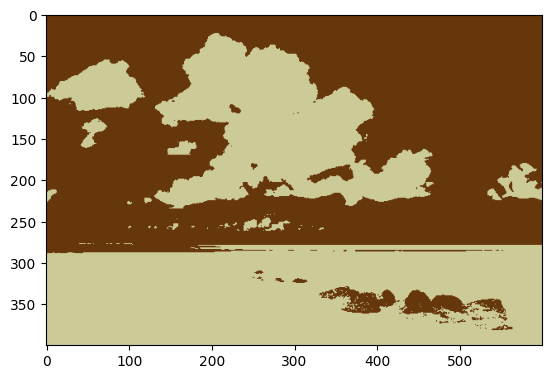

In [6]:
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # конвертируем в RGB
pixel_values = image.reshape((-1, 3)) # преобразовываем изображение в 2D массив пикселей и 3 RGB
pixel_values = np.float32(pixel_values) # конвертируем в float

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 2
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers) # ковертируем обратно в 8 bit

labels = labels.flatten()
segmented_image_k2 = centers[labels.flatten()]
segmented_image_k2 = segmented_image_k2.reshape(image.shape)
plt.imshow(segmented_image_k2)
plt.show()

**KMeans, число кластеров 5**

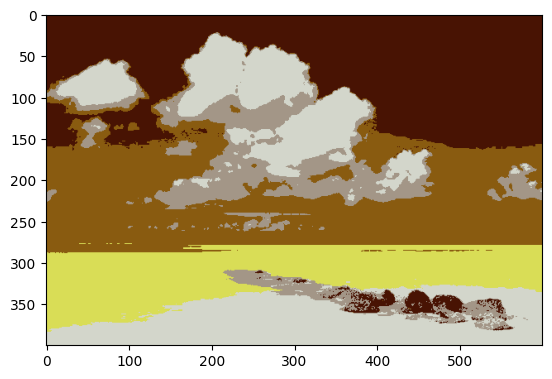

In [7]:
k = 5
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers) # ковертируем обратно в 8 bit

labels = labels.flatten()
segmented_image_k5 = centers[labels.flatten()]
segmented_image_k5 = segmented_image_k5.reshape(image.shape)
plt.imshow(segmented_image_k5)
plt.show()

**KMeans, число кластеров 10**

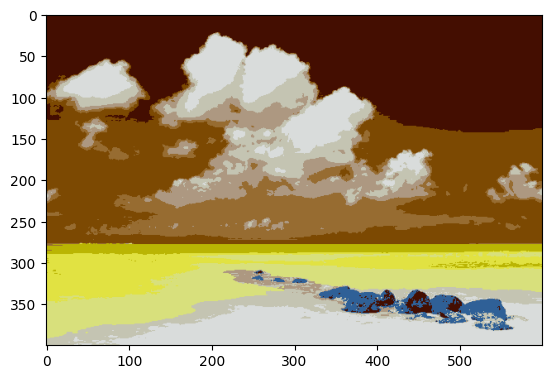

In [8]:
k = 10
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers) # ковертируем обратно в 8 bit

labels = labels.flatten()
segmented_image_k10 = centers[labels.flatten()]
segmented_image_k10 = segmented_image_k10.reshape(image.shape)
plt.imshow(segmented_image_k10)

**KMeans, число кластеров 20**

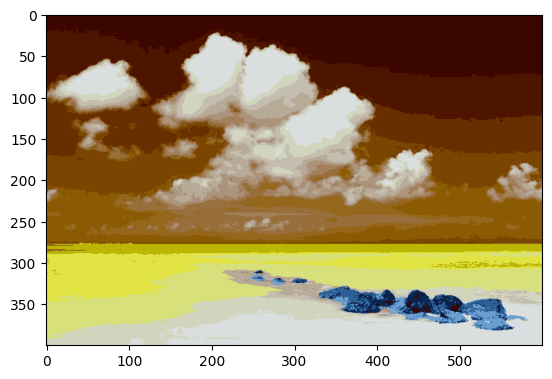

In [9]:
k = 20
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers) # ковертируем обратно в 8 bit

labels = labels.flatten()
segmented_image_k20 = centers[labels.flatten()]
segmented_image_k20 = segmented_image_k20.reshape(image.shape)
plt.imshow(segmented_image_k20)

*Просто зрительно мы видим, что чем больше крастеров тем больше "оттенков" мы получаем на графике*

**DBSCAN**

In [10]:
pixel_values

array([[ 69.,  10.,   0.],
       [ 69.,  10.,   0.],
       [ 69.,  10.,   0.],
       ...,
       [204., 220., 233.],
       [204., 220., 233.],
       [203., 219., 232.]], dtype=float32)

In [1]:
scaler = StandardScaler()
pixel_values_scaled = scaler.fit_transform(pixel_values)
pixel_values_normalized = normalize(pixel_values_scaled)
pixel_values_normalized = pd.DataFrame(pixel_values_normalized)

db_default = DBSCAN(min_samples = 3).fit(pixel_values_normalized)
labeling = db_default.labels_

NameError: ignored

**AgglomerativeClustering, число кластеров 2**

**AgglomerativeClustering, число кластеров 5**

**AgglomerativeClustering, число кластеров 10**

**AgglomerativeClustering, число кластеров 20**



---



---



---



# 3. Для каждой модели оцените потери от уменьшения цветов при помощи метрики SSIM.



---



---



---



# 4. Сформулируйте выводы по проделанной работе.
*   Какая модель показала лучший результат?